# Why Do We Care About Anomalies
---


## Direct Function

- Detecting anomalies in the heartbeat data can help in predicting heart diseases. 
- Anomalies in traffic patterns can help in predicting accidents. 
- It can also be used to identify bottlenecks in network infrastructure and traffic between servers

## Indirect Function

- when preparing datasets for machine learning models, it is really important to detect all the outliers and either get rid of them or analyze them to know why you had them there in the first place

---

# Method 1 — Standard Deviation:

![Standard Deviation](https://miro.medium.com/max/3144/1*rV7rq7F_uB5gwjzzGJ9VqA.png)

In [5]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(1)
anomalies = []

# multiply and add by random numbers to get some real values
data = np.random.randn(50000)  * 20 + 20

# Function to Detection Outlier on one-dimentional datasets.
def find_anomalies(random_data):
    # Set upper and lower limit to 3 standard deviation
    random_data_std = np.std(random_data)
    random_data_mean = np.mean(random_data)
    anomaly_cut_off = random_data_std * 3
    
    lower_limit  = random_data_mean - anomaly_cut_off 
    upper_limit = random_data_mean + anomaly_cut_off
    
    # Generate outliers
    for outlier in random_data:
        if outlier > upper_limit or outlier < lower_limit:
            anomalies.append(outlier)
    return anomalies

find_anomalies(data)

[80.61714224744061,
 99.17205408075927,
 86.4215751234073,
 -41.0752876085261,
 -43.06714900382097,
 -40.32063970418597,
 88.65326863591119,
 -41.28282712210201,
 94.80497807409178,
 82.70094680175814,
 84.76686393504752,
 -45.06068469953237,
 82.64059456281011,
 80.25509136474466,
 -43.81232693648161,
 -45.21230191553079,
 88.08604551497943,
 82.369591815651,
 85.9708104656157,
 82.97968050439259,
 -45.8971681339703,
 -41.11266480828613,
 100.53698089094755,
 -44.38264211247683,
 82.23783662033449,
 92.26554014166295,
 87.96231313004853,
 91.21746641411097,
 -53.128801985095905,
 -45.641575926212354,
 91.21225295344836,
 -43.46923274683489,
 82.13498657145581,
 82.90737927394908,
 -46.216851244091984,
 -41.9565310384887,
 -45.6065519410858,
 80.5243698860871,
 -43.30420249353775,
 -42.25263324372853,
 81.59215546151304,
 103.36235355910189,
 96.68762041821407,
 -40.586879558462776,
 -48.71851620008829,
 -45.18412137279293,
 81.54158108441533,
 84.5587224070789,
 -40.7688517191754,
 -4

# Method 2 — Boxplots 

![Boxplots](https://miro.medium.com/max/1280/1*AU07MCIdvUnjskY1XH9auw.png)

Interquartile Range (IQR) is important because it is used to define the outliers. It is the difference between the third quartile and the first quartile (IQR = Q3 -Q1). Outliers in this case are defined as the observations that are below (Q1 − 1.5x IQR) or boxplot lower whisker or above (Q3 + 1.5x IQR) or boxplot upper whisker.

![IQR](https://miro.medium.com/max/2508/1*J5Xm0X-phCJJ-DKZMZ_88w.png)

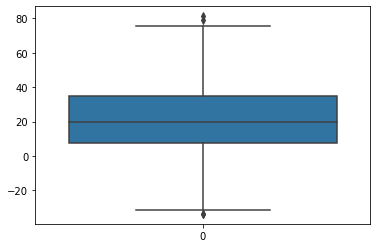

In [8]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(data = np.random.randn(500)*20 + 20)

# Method 3— DBScan Clustering:

DBScan is a clustering algorithm that’s used cluster data into groups. It is also used as a density-based anomaly detection method with either single or multi-dimensional data. Other clustering algorithms such as k-means and hierarchal clustering can also be used to detect outliers

---

## concepts

- **Core Points**: In order to understand the concept of the core points, we need to visit some of the hyperparameters used to define DBScan job. First hyperparameter (HP)is min_samples. This is simply the minimum number of core points needed in order to form a cluster. second important HP is eps. eps is the maximum distance between two samples for them to be considered as in the same cluster

- **Border Points** are in the same cluster as core points but much further away from the centre of the cluster.

![](https://miro.medium.com/max/750/1*d35zOOP2PQ13ZROxr9ddjA.png)

- Everything else is called **Noise Points**, those are data points that do not belong to any cluster. They can be anomalous or non-anomalous and they need further investigation

**<font color="#dd0000">The output of the following code is 94. This is the total number of noisy points. SKLearn labels the noisy points as (-1). The downside with this method is that the higher the dimension, the less accurate it becomes. You also need to make a few assumptions like estimating the right value for eps which can be challenging.</font>**

In [12]:
import numpy as np
from sklearn.cluster import DBSCAN
np.random.seed(1)
random_data = np.random.randn(50000,2)  * 20 + 20

outlier_detection = DBSCAN(min_samples = 2, eps = 3)
clusters = outlier_detection.fit_predict(random_data)
list(clusters).count(-1)

94

# Method 4— Isolation Forest:

**<font color="#dd0000">This algorithm works great with very high dimensional datasets and it proved to be a very effective way of detecting anomalies</font>**

It explicitly isolates anomalies instead of profiling and constructing normal points and regions by assigning a score to each data point. It takes advantage of the fact that anomalies are the minority data points and that they have attribute-values that are very different from those of normal instances

Paper Link: [https://cs.nju.edu.cn/zhouzh/zhouzh.files/publication/icdm08b.pdf](https://cs.nju.edu.cn/zhouzh/zhouzh.files/publication/icdm08b.pdf)

**<font color="#dd0000">This code will output the predictions for each data point in an array. If the result is -1, it means that this specific data point is an outlier. If the result is 1, then it means that the data point is not an outlier</font>**

In [15]:
from sklearn.ensemble import IsolationForest
import numpy as np
np.random.seed(1)
random_data = np.random.randn(500,2)  * 20 + 20

clf = IsolationForest( max_samples=100, random_state = 1, contamination= 'auto')
preds = clf.fit_predict(random_data)
preds

array([-1,  1, -1, -1,  1, -1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1, -1,  1, -1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,
       -1, -1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1, -1,  1,  1, -1, -1, -1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1, -1, -1,  1,  1,  1,  1,  1,  1,  1, -1,
        1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1, -1,  1,  1,  1, -1,
       -1, -1, -1,  1,  1,  1,  1,  1, -1, -1, -1,  1,  1,  1, -1,  1,  1,
       -1,  1,  1,  1,  1, -1,  1, -1,  1, -1,  1, -1,  1,  1,  1,  1, -1,
        1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,
        1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1, -1, -1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1, -1,  1,  1,  1,
       -1, -1, -1,  1, -1,  1,  1,  1, -1,  1,  1, -1, -1,  1,  1,  1, -1,
        1, -1, -1, -1,  1, -1,  1,  1, -1,  1,  1,  1,  1,  1,  1, -1, -1,
        1,  1,  1,  1,  1

# Method 5— Robust Random Cut Forest:

Random Cut Forest (RCF) algorithm is Amazon’s unsupervised algorithm for detecting anomalies. It works by associating an anomaly score as well. Low score values indicate that the data point is considered “normal.” High values indicate the presence of an anomaly in the data. The definitions of “low” and “high” depend on the application but common practice suggests that scores beyond three standard deviations from the mean score are considered anomalous.

[Paper Link](http://proceedings.mlr.press/v48/guha16.pdf)

---

## <font color="#dd0000">Most Important</font>
- **The great thing about this algorithm is that it works with very <font color="#dd0000">high dimensional</font> data. It can also work on <font color="#dd0000">real-time streaming</font> data (built in AWS Kinesis Analytics) as well as offline data**.
- **The paper shows some performance benchmarks when compared with Isolation Forest. Here are the results from the paper which shows that RCF is much <font color="#dd0000">more accurate and faster</font> than Isolation Forests**.


## Code Implementation

[https://github.com/awslabs/amazon-sagemaker-examples/tree/master/introduction_to_amazon_algorithms/random_cut_forest](https://github.com/awslabs/amazon-sagemaker-examples/tree/master/introduction_to_amazon_algorithms/random_cut_forest)